In [1]:
from mediapipe import solutions as mp
import cv2 as cv
import numpy as np

In [2]:
mp_drawing=mp.drawing_utils
mp_holistic=mp.holistic

In [3]:
holistic=mp_holistic.Holistic(min_detection_confidence=0.7)

In [4]:
21*3

63

In [4]:
def draw_landmarks(results,image):
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    # mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,mp_drawing.DrawingSpec(color=(0,255,0),thickness=1,circle_radius=1),mp_drawing.DrawingSpec(color=(0,255,0),thickness=1,circle_radius=1))
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    
    

In [5]:
def extract_landmarks(results):
    lh=np.array([[landmark.x,landmark.y,landmark.z] for landmark in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    rh=np.array([[landmark.x,landmark.y,landmark.z] for landmark in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    
    
    pose=np.array([[landmark.x,landmark.y,landmark.z] for landmark in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)

    return np.concatenate([lh,rh,pose])

In [25]:
cap=cv.VideoCapture(0)

while cap.isOpened():
    _,frame=cap.read()
    try:
        if cv.waitKey(1)==27:
            cap.release()
            cv.destroyAllWindows()
            break
            
        image=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
        results=holistic.process(image)
        image=cv.cvtColor(image,cv.COLOR_RGB2BGR)
        draw_landmarks(results,image)
        landmarks=extract_landmarks(results)
        # print(landmarks.shape)
    except:
        continue
        
    
    
    cv.imshow('frame',image)

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [12]:
total_landmarks=len(results.pose_landmarks.landmark)+len(results.right_hand_landmarks.landmark)+len(results.right_hand_landmarks.landmark)

In [15]:
total_landmarks,21*2+33

(75, 75)

In [16]:
len(results.pose_landmarks.landmark)

33

In [17]:

from pandas import *

In [90]:
# total_landmarks=99+63+63

In [91]:
# total_landmarks

225

In [18]:
landmark_list=[]
for i in range(75):
    landmark_list=landmark_list+[f'x{i}',f'y{i}',f'z{i}']

In [19]:
len(landmark_list)

225

In [20]:
landmarks.shape

(225,)

In [330]:
df=DataFrame(columns=landmark_list)

In [331]:
df

Empty DataFrame
Columns: [x0, y0, z0, x1, y1, z1, x2, y2, z2, x3, y3, z3, x4, y4, z4, x5, y5, z5, x6, y6, z6, x7, y7, z7, x8, y8, z8, x9, y9, z9, x10, y10, z10, x11, y11, z11, x12, y12, z12, x13, y13, z13, x14, y14, z14, x15, y15, z15, x16, y16, z16, x17, y17, z17, x18, y18, z18, x19, y19, z19, x20, y20, z20, x21, y21, z21, x22, y22, z22, x23, y23, z23, x24, y24, z24, x25, y25, z25, x26, y26, z26, x27, y27, z27, x28, y28, z28, x29, y29, z29, x30, y30, z30, x31, y31, z31, x32, y32, z32, x33, ...]
Index: []

[0 rows x 225 columns]

In [332]:
class_df=DataFrame(columns=['class'])

In [333]:
class_df

Empty DataFrame
Columns: [class]
Index: []

In [335]:

# collecting live data
class_name='u'

In [337]:
cap=cv.VideoCapture(0)

while cap.isOpened():
    _,frame=cap.read()
    
        
    image=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
    results=holistic.process(image)
    image=cv.cvtColor(image,cv.COLOR_RGB2BGR)
    draw_landmarks(results,image)
    landmarks=extract_landmarks(results)
    
    
    #adding data to pandas data_frame
    df.loc[len(df)]=landmarks
    class_df.loc[len(class_df)]=class_name
    cv.putText(image,f'{len(class_df)}',(100,50),cv.FONT_HERSHEY_COMPLEX_SMALL,2,(255,0,0),1,cv.LINE_AA)
    cv.putText(image,f'{class_name}',(50,50),cv.FONT_HERSHEY_COMPLEX_SMALL,2,(255,0,0),1,cv.LINE_AA)
    if cv.waitKey(2)==27:
        cap.release()
        cv.destroyAllWindows()
        break
    
    
    cv.imshow('frame',image)

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warn

In [101]:
cap.release()

In [338]:
df.shape,class_df.shape

((1217, 225), (1217, 1))

In [339]:
df=df.head(1200)

In [340]:
class_df=class_df.head(1200)

In [341]:
class_df

class
0        u
1        u
2        u
3        u
4        u
...    ...
1195     u
1196     u
1197     u
1198     u
1199     u

[1200 rows x 1 columns]

In [51]:
import seaborn as sns

In [56]:
df.iloc[0]

x0     5.893159e-01
y0     8.090759e-01
z0    -4.142274e-07
x1     5.514551e-01
y1     7.390618e-01
           ...     
y73    2.651589e+00
z73   -5.820300e-02
x74    4.407920e-01
y74    2.663767e+00
z74   -2.571962e-01
Name: 0, Length: 225, dtype: float64

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


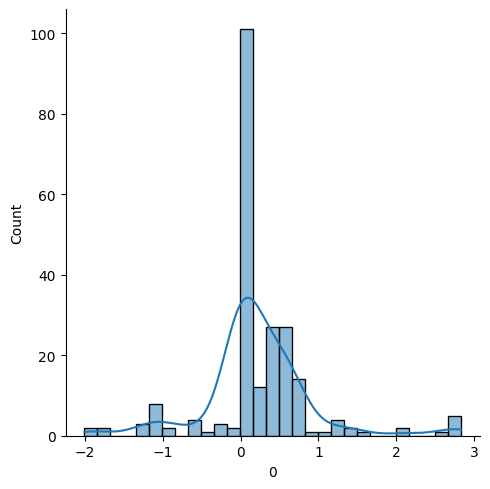

In [342]:
sns.displot(df.iloc[0],kde=True)

In [114]:
# del df
# del class_df

In [47]:
int(-4.384927e-07)

0

In [52]:
-8.509754e-07 < -4.384927e-07

True

In [138]:
# df.to_csv('a.csv')
# class_df.to_csv('rlasses.csv')

In [343]:
df['class']=class_df['class']

C:\Users\vivek chouhan\AppData\Local\Temp\ipykernel_13660\3697307310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class']=class_df['class']


In [344]:
df

x0   y0   z0   x1   y1   z1   x2   y2   z2   x3  ...       x72  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.362074   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.395127   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.426343   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.425079   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.421242   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
1195  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.396533   
1196  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.408894   
1197  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.412027   
1198  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.410028   
1199  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.411894   

           y72       z72       x73       y73       z73       x74       y74  \
0     2.743109  0.408912  0.559361  2.831101 -0.172871  0.388718  2.831558   
1     2.730210  0.404963  0.579832  2.815639 -0.177704  0.418374  2.822467   
2     2.725234  0.455753  0.606652  2.809573 -0.184282  0.443703  2.816068   
3     2.724294  0.415180  0.614255  2.805760 -0.150578  0.450658  2.816019   
4     2.719340  0.358394  0.612186  2.802147 -0.162104  0.444973  2.811313   
...        ...       ...       ...       ...       ...       ...       ...   
1195  2.619258  0.432335  0.580813  2.701213 -0.290227  0.423544  2.715566   
1196  2.626120  0.412166  0.596035  2.703885 -0.246871  0.438018  2.720981   
1197  2.633088  0.338906  0.597148  2.707483 -0.274493  0.437686  2.724823   
1198  2.633225  0.291997  0.595666  2.707923 -0.273248  0.436072  2.724965   
1199  2.632773  0.314526  0.595715  2.707891 -0.297729  0.438057  2.724628   

           z74  class  
0    -0.236845      u  
1    -0.241288      u  
2    -0.158240      u  
3    -0.217571      u  
4    -0.298450      u  
...        ...    ...  
1195 -0.172715      u  
1196 -0.179991      u  
1197 -0.252500      u  
1198 -0.306626      u  
1199 -0.286387      u  

[1200 rows x 226 columns]

In [345]:
df.to_csv("u.csv")

In [147]:
start_point1=(180-3,0)

In [148]:
end_point1=(180-3,480)

In [149]:
start_point2=(440,0)

In [150]:
end_point2=(440,480)

In [151]:
cap=cv.VideoCapture(0)

while cap.isOpened():
    _,frame=cap.read()
    try:
        
            
        image=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
        results=holistic.process(image)
        image=cv.cvtColor(image,cv.COLOR_RGB2BGR)
        draw_landmarks(results,image)
        cv.line(image,start_point1,end_point1,(0,255,0),3)
        cv.line(image,start_point2,end_point2,(0,255,0),3)
        cv.putText(image,'place yourself in such a position ',(20,380),cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),1,cv.LINE_AA)
        cv.putText(image,'that both shoulders come inside ',(20,400+8),cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),1,cv.LINE_AA)
        cv.putText(image,'the green box and do ready sign',(20,420+8),cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),1,cv.LINE_AA)
        # landmarks=extract_landmarks(results)
    except:
        pass
    
    
    if cv.waitKey(1)==27:
            cap.release()
            cv.destroyAllWindows()
            break
    cv.imshow('frame',image)

In [32]:
# range 1
results.pose_landmarks.landmark[14],results.pose_landmarks.landmark[13]

(x: 0.3756353
 y: 0.7029769
 z: -0.2134277
 visibility: 0.9730139,
 x: 0.7888814
 y: 0.67163056
 z: -0.15271327
 visibility: 0.954656)

In [28]:
# range 2
results.pose_landmarks.landmark[14],results.pose_landmarks.landmark[13]

(x: 0.40908027
 y: 0.72627217
 z: -0.1940277
 visibility: 0.9550642,
 x: 0.71907794
 y: 0.70081997
 z: -0.13998124
 visibility: 0.9583299)

In [30]:
# range 3
results.pose_landmarks.landmark[14],results.pose_landmarks.landmark[13]


(x: 0.4103341
 y: 0.7191417
 z: -0.2233502
 visibility: 0.9760119,
 x: 0.69762313
 y: 0.7088432
 z: -0.098089956
 visibility: 0.9778157)

In [8]:
image.shape

(480, 640, 3)

In [10]:
results.pose_landmarks.landmark[24]

x: 0.38702258
y: 1.5778618
z: 0.04150772
visibility: 0.0005064775

In [11]:
results.pose_landmarks.landmark[12]

x: 0.32288572
y: 0.90164894
z: -0.41410336
visibility: 0.9754075

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [154]:
X_train, X_test, y_train, y_test=train_test_split(df,class_df,test_size=0.15,stratify=class_df)

In [155]:
X_train.shape,y_train.shape

((859, 225), (859, 1))

In [157]:
X_test.shape

(152, 225)

In [158]:
pipeline_dict={
    'lr':make_pipeline(StandardScaler(),LogisticRegression()),
    'rc':make_pipeline(StandardScaler(),RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(),RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(),GradientBoostingClassifier()),
}

In [159]:
model_dict={}
for name,pipeline in pipeline_dict.items():
    model=pipeline.fit(X_train,y_train)
    model_dict[name]=model

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:1179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sk

In [160]:
model_dict

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [161]:
evaluating_dict={}
for name,model in model_dict.items():
    evaluating_dict[name]=model.score(X_test,y_test)

In [163]:
evaluating_dict

{'lr': 0.993421052631579, 'rc': 1.0, 'rf': 1.0, 'gb': 1.0}

In [179]:
model=model_dict['rf']

In [168]:
y_p=model.predict(X_test)

In [169]:
actual=y_test

In [167]:
# displaying confusion matrix
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

In [173]:
import matplotlib.pyplot as plt

In [170]:
cm=confusion_matrix(actual,y_p)

In [171]:
cm

array([[80,  0],
       [ 0, 72]], dtype=int64)

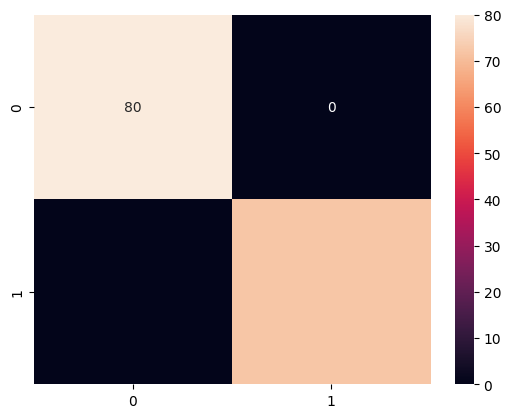

In [177]:
heatmap(cm,annot=True)
plt.savefig('heatmap_ready_model')

In [178]:
import pickle

In [180]:
pickle.dump(model,open('ready_model.pickle','wb'))

In [181]:
import time

In [182]:
# real time predictions

In [197]:
cap=cv.VideoCapture(0)
time.sleep(5)
while cap.isOpened():
    _,frame=cap.read()
    try:
    
        
        image=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
        results=holistic.process(image)
        image=cv.cvtColor(image,cv.COLOR_RGB2BGR)
    
        draw_landmarks(results,image)
        cv.line(image,start_point1,end_point1,(0,255,0),3)
        cv.line(image,start_point2,end_point2,(0,255,0),3)
        
        landmarks=extract_landmarks(results)
        
        text=model.predict(np.expand_dims(landmarks,0))[0]
        cv.putText(image,text,(400,400),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(255,0,0),1,cv.LINE_AA)
    except:
        pass
    
    if cv.waitKey(2)==27:
        cap.release()
        cv.destroyAllWindows()
        break
    
    
    cv.imshow('frame',image)

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not ha

In [184]:
model.predict(X_test)

array(['not ready', 'ready', 'not ready', 'ready', 'not ready', 'ready',
       'ready', 'ready', 'not ready', 'not ready', 'ready', 'ready',
       'ready', 'not ready', 'ready', 'ready', 'ready', 'ready',
       'not ready', 'not ready', 'not ready', 'ready', 'ready', 'ready',
       'ready', 'ready', 'ready', 'not ready', 'not ready', 'not ready',
       'not ready', 'not ready', 'not ready', 'not ready', 'ready',
       'ready', 'not ready', 'not ready', 'ready', 'ready', 'ready',
       'ready', 'not ready', 'not ready', 'not ready', 'not ready',
       'ready', 'not ready', 'not ready', 'not ready', 'not ready',
       'not ready', 'ready', 'ready', 'ready', 'not ready', 'not ready',
       'not ready', 'ready', 'ready', 'ready', 'not ready', 'ready',
       'not ready', 'ready', 'ready', 'ready', 'not ready', 'not ready',
       'not ready', 'ready', 'ready', 'not ready', 'ready', 'not ready',
       'ready', 'not ready', 'not ready', 'not ready', 'ready', 'ready',
       'ready

In [192]:
model.predict(np.expand_dims(X_test.values[0],0),)

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['not ready'], dtype=object)